### > **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Medical Appointments No-Show Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
## Define a function to inspect datasets

def inspect(a):
    print ('This dataset has', a.shape[0], ' rows and ',a.shape[1],' columns..')
    print ('It has ',a.duplicated().sum(), 'duplicate records..' )


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('noshowappointments.csv')
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


In [4]:
inspect(df)

This dataset has 110527  rows and  14  columns..
It has  0 duplicate records..



### Data Cleaning (Replace this with more specific notes!)

Cheking for null values ... GREAT!! no null values

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


 Checking for duplicate records

In [30]:
inspect(df)

This dataset has 110527  rows and  14  columns..
It has  0 duplicate records..


GREAT!! No Duplicated records... 

Now, we move on to consider converting columns data types. 

1 - `PatientId` need to be changed from float to int

In [7]:
df['PatientId'] =  pd.to_numeric( df['PatientId'] , downcast='integer')

In [8]:
## Verify
df.PatientId[1:7]

1    558998000000000
2      4262960000000
3       867951000000
4      8841190000000
5     95985100000000
6    733688000000000
Name: PatientId, dtype: int64

2- Convert `AppointmentDay` and `ScheduledDay` to Date/Time format

In [9]:
df.AppointmentDay =  pd.to_datetime(df.AppointmentDay)
df.ScheduledDay = pd.to_datetime(df.ScheduledDay)

In [10]:
## Verify 
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872500000000,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558998000000000,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262960000000,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951000000,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


#### Rename Columns 

Two columns `No-Show` and `SMS_received` need to be renamed inroder to maintain consistancy in columns naming convention in the dataset.

In [11]:
## Rename No-Show
df.rename(columns={df.columns[13]:"NoShow"}, inplace=True)

## Rename SMS_recived
df.rename(columns={df.columns[12]:"SMSReceived"}, inplace=True)

In [12]:
#final check 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null int64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMSReceived       110527 non-null int64
NoShow            110527 non-null object
dtypes: datetime64[ns](2), int64(9), object(3)
memory usage: 11.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.


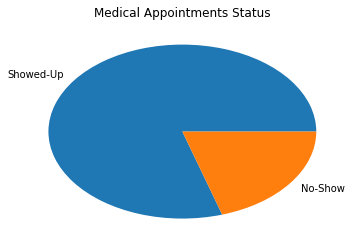

In [13]:
s = df.groupby('NoShow').count()['Age']
plt.pie(s,labels=['Showed-Up','No-Show'])
plt.title('Medical Appointments Status');

By doing an overview of all the dataset, we could see that majority of the medical appointments were not  "no-Show" appointments. 

In [14]:
# s is the number of appintments with or without no-show status 
s 

NoShow
No     88208
Yes    22319
Name: Age, dtype: int64

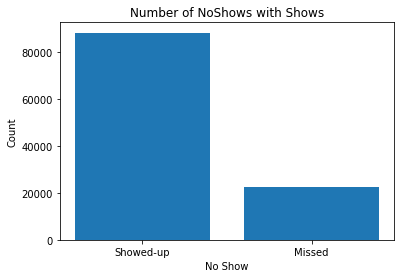

In [15]:
plt.bar(x=s.index, height=s )
plt.xticks(s.index,['Showed-up', 'Missed'])
plt.xlabel('No Show')
plt.ylabel('Count');
plt.title('Number of NoShows with Shows');

We will split the data set into two parts: missed appointments, and not missed appointments


In [16]:
## Spliting the dataset into two datasets
df_show = df[df.NoShow == 'No'] 
df_noshow = df[df.NoShow == 'Yes']

In [35]:
# double check the size of eacg sub-dataset
inspect(df_show), inspect(df_noshow)

This dataset has 88208  rows and  14  columns..
It has  0 duplicate records..
This dataset has 22319  rows and  15  columns..
It has  0 duplicate records..


(None, None)

After the split, we tend to do primary data analysis with regards to demographical porporties for 

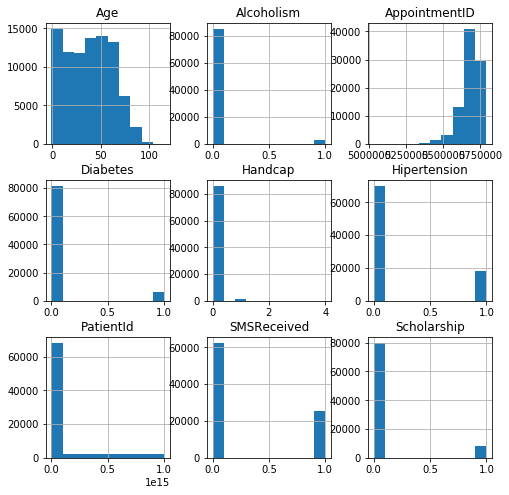

In [18]:
df_show.hist(figsize=(8,8));

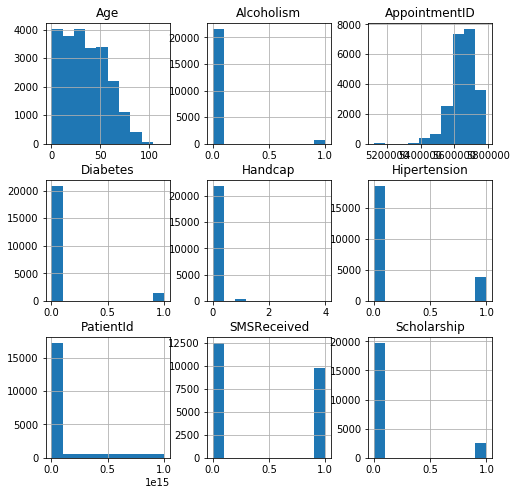

In [19]:
df_noshow.hist(figsize=(8,8));

#### Age Analysis : Does Age is a major diffrence beween patients who showed up on thoese who didn't?

We check the `Age` cloumns and compere the numbers between both datasets to see if there is signigifcat diffrence.

''

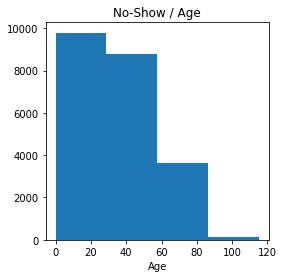

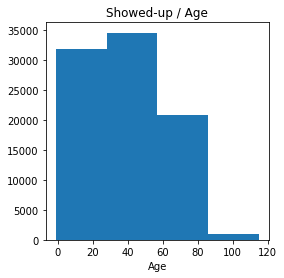

In [20]:
plt.subplots(1,1, figsize=(4,4))
plt.hist(df_noshow['Age'],bins=4)
plt.title('No-Show / Age')
plt.xlabel('Age')


plt.subplots(1,1, figsize=(4,4))
plt.hist(df_show['Age'], bins=4)
plt.title('Showed-up / Age')
plt.xlabel('Age')
;

##### Conlcusion: Age is not a factor to determin weather a patient will show or will not to his/her appointment.  

### Research Question 1 : Do Patients with chronical medical condition show-up more than others?

Do patients with medical chronical conditions (e.g. diabetes) that require special and continous medical care tend to make sure to show up to all their appointments more then other type of patients? 

To check this, we will create one dataframe for medical apponitments for patients with chronical medical cases `df_cmc` and anothere for medical appontiments for patients without CMC `df_normal`

In [21]:
df_cmc  = df.query('Hipertension == 1 or Diabetes ==1 or Alcoholism == 1 or Handcap > 0')
df_normal = df.query('Hipertension == 0 and Diabetes == 0 and Alcoholism == 0 and Handcap == 0')

In [22]:
cmc_show = df_cmc.groupby('NoShow')['Age'].count()
cmc_show

NoShow
No     21696
Yes     4716
Name: Age, dtype: int64

In [23]:
normal_show = df_normal.groupby('NoShow')['Age'].count()
normal_show

NoShow
No     66512
Yes    17603
Name: Age, dtype: int64

In [24]:
cmc = df_cmc.NoShow.value_counts()
norm = df_normal.NoShow.value_counts()


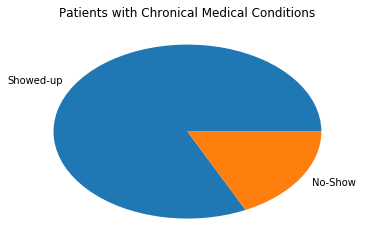

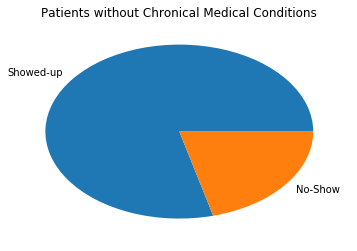

In [25]:
plt.figure(1)
plt.pie(cmc,labels=['Showed-up','No-Show'])
plt.title('Patients with Chronical Medical Conditions')

plt.figure(2)
plt.title('Patients without Chronical Medical Conditions')
plt.pie(norm, labels=['Showed-up','No-Show']);

From the anlysis of the graphs above, there is no significant diffrenace between the % of No-shows appointments when compared for patients with chronic medical condition (CMC) and those who don't. As a result, we can conclude based on the limited dataset we have that patient medical condition is not a factor in determining status of medical appointments. 

### Research Question 2 : Appointment Date is a factor?

Does the time taken between schduling the appointment and the day of the appointment itself has any effect on the posiblity of missing the appointment?

To answer this question, we will need to create a new column `Time` in the origianl dataset as the diffrence between `AppointmentDay` and `ScheduledDay`. 

In order to do that, we need to import  `datetime` package first. 

In [26]:
import datetime as dt

## FOR ALL NO-SHOW Appointments
df_noshow['Time'] = df_noshow.AppointmentDay.dt.date - df_noshow.ScheduledDay.dt.date

## FOR ALL SHOWED-UP Appointments 
df_normal['Time'] = df_normal.AppointmentDay.dt.date - df_normal.ScheduledDay.dt.date


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


First, we do this analysis for the no-show sub-dataset `df_noshow` we've created earlier.  

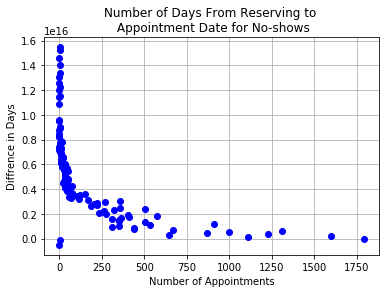

In [27]:
times_noshow = df_noshow.groupby('Time').count()['Age']

plt.plot(times_noshow.values, times_noshow.index, 'bo')
plt.grid()
plt.title('Number of Days From Reserving to \n Appointment Date for No-shows')
plt.xlabel('Number of Appointments')
plt.ylabel('Diffrence in Days');

We see that the number of appointments for 0 days = 1750... the more the days, the less the number of appointments. Also, the graph shows that thre are very few number of appointments with date diffrence less than 0 which does not make any scense, but we could ignore them as they are very few compared to the total number of records in the data set. 

Second, we do this analysis for the "show" sub-dataset `df_normal` we've created earlier.  

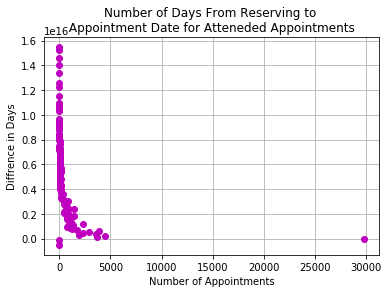

In [28]:
times_normal = df_normal.groupby('Time').count()['Age']

plt.plot(times_normal.values, times_normal.index, 'mo')
plt.grid()
plt.title('Number of Days From Reserving to \n Appointment Date for Atteneded Appointments ')
plt.xlabel('Number of Appointments')
plt.ylabel('Diffrence in Days');

Here we that the majoirty of the dataset records has day diffrence = 0. 

In other words, out of 84115 appointments where patients shows up to, almost 30,000 of them had booked their apporintment on the same day.


<a id='limitations'></a>
## Limitations

> Due to the limited nature of this given dataset, other anlysis options for other factors were not possible to make. 
For example, we couldn't analyse the data to find any relation between where the patient lived and weatheer that be a factor in determinning if an apponitment is a no-show since we dont know the address of the hispital itslef. Yes, we could do a simple statstical analysis based on the patien address to see which addrss showes in the top, but it would be very hard to draw solid conclusion afeterwards without knowing where these address are in relation to the hispitcal location. 

<a id='conclusions'></a>
## Conclusions

> **1**: The meidcal condition of the patient is not a factor to rely on deciding if an appointmnet will be a no-show or not. This result is based on the analysis of the given dataset. It showed no direct relation between weather the patient had a chronical medical condition and weather he/she will be more motivated and committeed to show-up to the next medical appointmnt 

> **2**: The lenght of time taken from booking a medical appointment and the actual data of that medical appintment could be conidered a valuable factor in determinning waether or not a medical apponitment will be a no-show. This may need to be tested and verified  on a bigger dataset.

> **3**: Further anlysis would be required on a bigger scale that includes other columns inorder to draw more conluctions.    


In [36]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0